In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm

In [ ]:
datadir = "/content/drive/MyDrive/VNesefood/Train"

In [ ]:
categories=['Banhchung','Banhkhot','Banhmi','Bundaumamtom','Comtam','Galuoc','Goicuon','Kembo','Pho','Raumuong']

In [ ]:
img_size=128

[[  8  26  36 ...  97  88  84]
 [ 12  30  30 ...  95  88  82]
 [ 19  28  29 ...  87  87  83]
 ...
 [ 24  25  33 ... 210  90 136]
 [ 37  34  35 ... 198 157 137]
 [ 40  42  38 ... 132 153 132]]


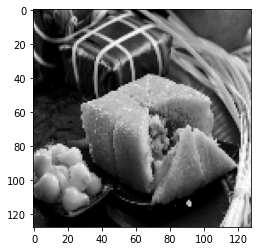

In [ ]:
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 30/30 [00:05<00:00,  5.30it/s]

300


In [ ]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)

In [ ]:
print('x',x.shape)

x (300, 128, 128, 1)


In [ ]:
print('y',y.shape)

y (300,)


In [ ]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/VNesefood/Save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

In [ ]:
pickle_out=open("/content/drive/MyDrive/VNesefood/Save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [ ]:
pickle_in = open("/content/drive/MyDrive/VNesefood/Save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/VNesefood/Save/y.pickle","rb")
y= pickle.load(pickle_in)

In [ ]:
X=X/255.0

In [ ]:
X.shape

(300, 128, 128, 1)

In [ ]:
y.shape

(300,)

In [ ]:
y= to_categorical(y,10)

In [ ]:
y.shape

(300, 10)

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(128,128,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam

In [ ]:
opt =Adam()

In [ ]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X,y,epochs=100,batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/100
4/4 [==============================] - 16s 967ms/step - loss: 11.9470 - accuracy: 0.1375 - val_loss: 4.3763 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 85ms/step - loss: 2.3330 - accuracy: 0.1125 - val_loss: 3.5905 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 84ms/step - loss: 2.1555 - accuracy: 0.0917 - val_loss: 4.4248 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 84ms/step - loss: 2.0848 - accuracy: 0.1375 - val_loss: 7.0951 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 85ms/step - loss: 1.9979 - accuracy: 0.2583 - val_loss: 8.9022 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 85ms/step - loss: 1.8930 - accuracy: 0.2833 - val_loss: 12.4086 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 87ms/step - loss: 1.7289 - accuracy: 0.4083 - val_loss: 16.2482 - val_accuracy

In [ ]:
model.save('VNesefood.h5')

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

In [ ]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(128, 128))	
	
	return img
labels = {0: 'Banhchung',1: 'Banhkhot',2: 'Banhmi',3:'Bundaumamtom',4:'Comtam',5:'Galuoc',6:'Goicuon',7:'Kembo',8:'Pho',9:'Raumuong'}

In [ ]:
model = load_model('VNesefood.h5')

(1, 128, 128, 1)

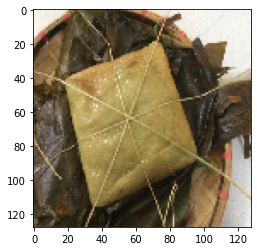

In [ ]:
img = load_image('/content/drive/MyDrive/VNesefood/Test/Banhchung/banhchungtest07.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape

In [ ]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Banhchung


(1, 128, 128, 1)

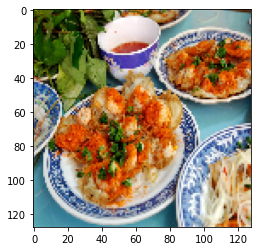

In [ ]:
img = load_image('/content/drive/MyDrive/VNesefood/Test/Banhkhot/banhkhottest09.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape

In [ ]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Banhkhot


(1, 128, 128, 1)

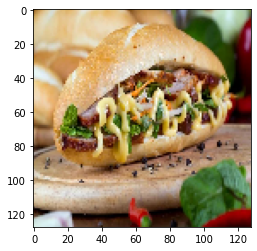

In [ ]:
img = load_image('/content/drive/MyDrive/VNesefood/Test/Banhmi/banhmitest08.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)   
img.shape

In [ ]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
expectation Banhmi


(1, 128, 128, 1)

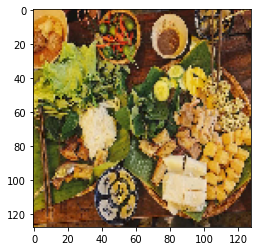

In [ ]:
img = load_image('/content/drive/MyDrive/VNesefood/Test/Bundaumamtom/bundaumamtomtest08.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape

In [ ]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
expectation Bundaumamtom


(1, 128, 128, 1)

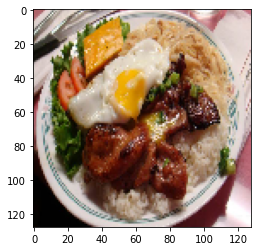

In [ ]:
img = load_image('/content/drive/MyDrive/VNesefood/Test/Comtam/comtamtest05.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape

In [ ]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
expectation Bundaumamtom


(1, 128, 128, 1)

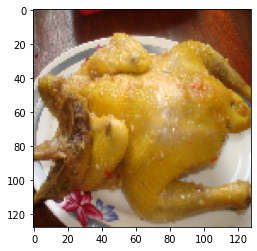

In [ ]:
img = load_image('/content/drive/MyDrive/VNesefood/Test/Galuoc/galuoctest09.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape

In [ ]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
expectation Galuoc


(1, 128, 128, 1)

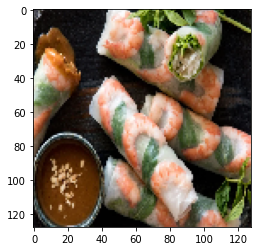

In [ ]:
img = load_image('/content/drive/MyDrive/VNesefood/Test/Goicuon/goicuontest09.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)   
img.shape

In [ ]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
expectation Goicuon


(1, 128, 128, 1)

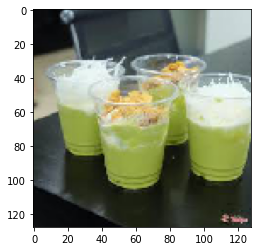

In [ ]:
img = load_image('/content/drive/MyDrive/VNesefood/Test/Kembo/kembotest06.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1) 
img.shape

In [ ]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
expectation Kembo


(1, 128, 128, 1)

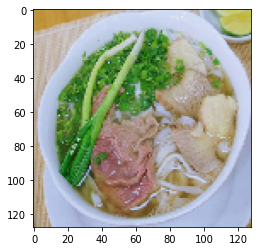

In [ ]:
img = load_image('/content/drive/MyDrive/VNesefood/Test/Pho/photest00.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)   
img.shape

In [ ]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
expectation Galuoc


(1, 128, 128, 1)

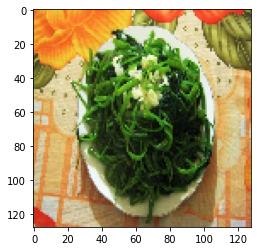

In [ ]:
img = load_image('/content/drive/MyDrive/VNesefood/Test/Raumuong/rautest09.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape

In [ ]:
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Banhchung
